In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
def stat_tests(x, y):
    res1 = ["Independent", "Dependent"]
    res2 = ["Same Disribution", "Different Distribution"]
    
    print("CORRELATION:")
    a, b = stats.pearsonr(x, y)
    print("  PearsonrResult(correlation={}, p_values={})    {}".format(a, b, res1[int(b<0.05)]))
    statistic = stats.spearmanr(x, y)
    print("  {}    {}".format(statistic, res1[int(statistic.pvalue<0.05)]))
    statistic = stats.kendalltau(x, y)
    print("  {}    {}".format(statistic, res1[int(statistic.pvalue<0.05)]))
    
    print("\nPARAMETRIC STATISTICAL HYPOTHESIS TESTS")
    statistic = stats.ttest_ind(x, y)
    print("  {}    {}".format(statistic, res2[int(statistic.pvalue<0.05)]))
    statistic = stats.ttest_rel(x, y)
    print("  {}    {}".format(statistic, res2[int(statistic.pvalue<0.05)]))
    statistic = stats.f_oneway(x, y)
    print("  {}    {}".format(statistic, res2[int(statistic.pvalue<0.05)]))
                        
    print('\nNON-PARAMETRIC STATISTICAL HYPOTHESIS TESTS')
    statistic = stats.mannwhitneyu(x, y)
    print("  {}    {}".format(statistic, res2[int(statistic.pvalue<0.05)]))
    statistic = stats.wilcoxon(x, y)
    print("  {}    {}".format(statistic, res2[int(statistic.pvalue<0.05)]))
    statistic = stats.kruskal(x, y)
    print("  {}    {}".format(statistic, res2[int(statistic.pvalue<0.05)]))

# Method I

In [4]:
l1 = []
l2 = []

for x in range(1,99):
    for y in range(x+5, 100):
        l1.append(x)
        l2.append(y)
        
l1 = np.array(l1)
l2 = np.array(l2)

In [5]:
def get_data(seed, x=l1, y=l2, vals = 30):
    np.random.seed(seed)
    idx = np.random.choice(len(l1), size = vals, replace=False)
    idx.sort()

    return x[idx], y[idx]

In [6]:
r_seed = 0
best_p = 0
best_corr = 1

for seed in range(1, 100000):
    x, y = get_data(seed, vals=30)
    corr, p_val = stats.pearsonr(x, y)
    if np.abs(corr) < best_corr:
        best_corr = np.abs(corr)
        r_seed = seed
        best_p = p_val
        
best_corr, best_p

(0.00012917960207798544, 0.9994594496137726)

In [7]:
x, y = get_data(r_seed, vals=30)

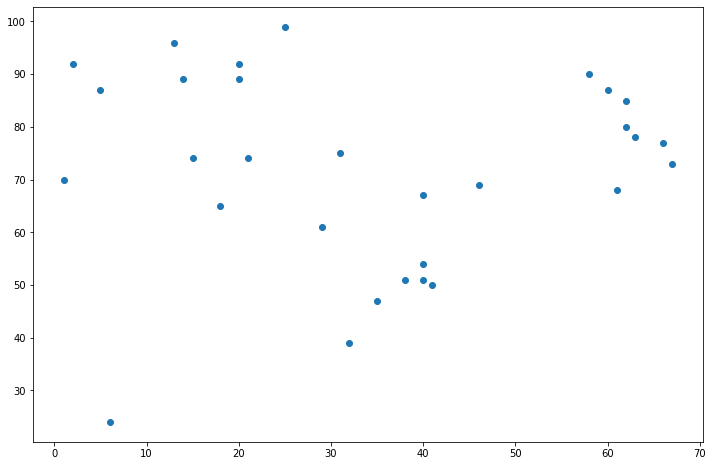

In [8]:
plt.scatter(x, y)
plt.show()

In [9]:
stat_tests(x, y)

CORRELATION:
  PearsonrResult(correlation=-0.00012917960207798544, p_values=0.9994594496137726)    Independent
  SpearmanrResult(correlation=-0.13743178612907406, pvalue=0.46893870451830544)    Independent
  KendalltauResult(correlation=-0.07674418604651163, pvalue=0.555357839885671)    Independent

PARAMETRIC STATISTICAL HYPOTHESIS TESTS
  Ttest_indResult(statistic=-7.371935950576838, pvalue=6.9492055417829e-10)    Different Distribution
  Ttest_relResult(statistic=-7.371464118233904, pvalue=4.028824163652124e-08)    Different Distribution
  F_onewayResult(statistic=54.345439659407255, pvalue=6.949205541782872e-10)    Different Distribution

NON-PARAMETRIC STATISTICAL HYPOTHESIS TESTS
  MannwhitneyuResult(statistic=80.0, pvalue=2.3298216822955272e-08)    Different Distribution
  WilcoxonResult(statistic=0.0, pvalue=1.726772765612998e-06)    Different Distribution
  KruskalResult(statistic=29.934309883166122, pvalue=4.469338552689325e-08)    Different Distribution


# Method II

In [10]:
seed = 69
noise = 5
sep = 5

np.random.seed(seed)
g = list(np.arange(1+noise, 100-noise, 13))
h = list(np.arange(g[0]+sep+noise, 100+sep-noise+2, 12))

x = []
y = []

for i in g:
    for j in h:
        if i<j:
            x.append(i + np.random.randint(-noise, noise+1))
            y.append(j + np.random.randint(-noise, noise+1))

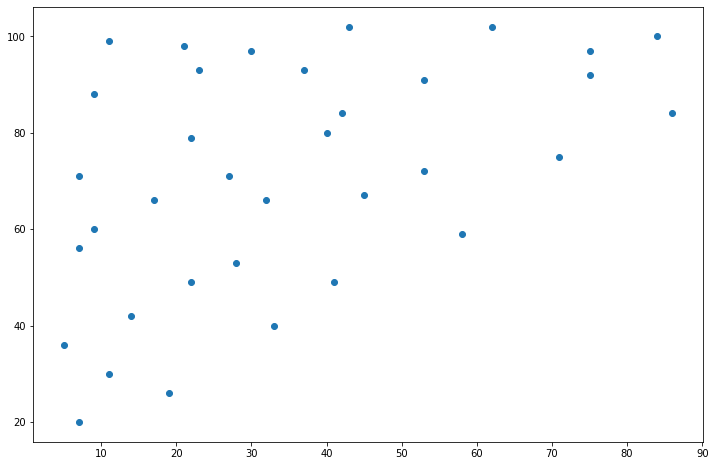

In [11]:
plt.scatter(x, y)
plt.show()

In [12]:
stat_tests(x, y)

CORRELATION:
  PearsonrResult(correlation=0.48530421827368425, p_values=0.0031263529088282026)    Dependent
  SpearmanrResult(correlation=0.48275379049974887, pvalue=0.003311538410831715)    Dependent
  KendalltauResult(correlation=0.3404256552017082, pvalue=0.004444529276609839)    Dependent

PARAMETRIC STATISTICAL HYPOTHESIS TESTS
  Ttest_indResult(statistic=-6.3532810271381726, pvalue=2.0315073917133732e-08)    Different Distribution
  Ttest_relResult(statistic=-8.85567688146397, pvalue=2.380819496803758e-10)    Different Distribution
  F_onewayResult(statistic=40.36417980979386, pvalue=2.0315073917133884e-08)    Different Distribution

NON-PARAMETRIC STATISTICAL HYPOTHESIS TESTS
  MannwhitneyuResult(statistic=184.5, pvalue=2.545956339111676e-07)    Different Distribution
  WilcoxonResult(statistic=2.0, pvalue=2.9423673907616493e-07)    Different Distribution
  KruskalResult(statistic=25.287736953194567, pvalue=4.938384832827543e-07)    Different Distribution
